<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/AyushKumarMishra_12240340.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's do some class Assignment**

**Q1) Remove Outliers and Compare Dataset Sizes?**

**Q2) What is the main reason for analyzing the outliers?**

**Q3) Find the all missing null values using two different methods in dataset ?**

**Q4) Explore whether we can merge "zomato.csv" and "country_code.xlsx" if yes then show the whole file in the csv format?**

**Q5) Find top 3 countries which uses zomato and plot it using piechart?**

**Q6) Use features like Aggregate Rating, Rating color, Rating text and try to findout the count present for each rating of the restaurants.**




Dataset Link - https://drive.google.com/file/d/10CVjDdS0NAZHKRfoPb5zsgXITD7qoYld/view?usp=sharing

## <span style="color:blue"> Importing all libraries <span>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### <span style="color: red;">Reading the zomato csv file and naming it as `df`.</span>

In [2]:
df= pd.read_csv("zomato.csv",encoding = "ISO-8859-1")

In [4]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


# <span style="color: blue;">QUES-1.</span>



##  <span style="color: green;">Outlier Removal Function</span>

The `remove_outliers(df)` function removes outliers from a DataFrame using the Interquartile Range (IQR) method. It operates as follows:

1. **Calculate Quartiles**: For each numeric column, it computes the first (Q1) and third quartiles (Q3).
2. **Determine IQR**: It calculates the Interquartile Range (IQR) as the difference between Q3 and Q1.
3. **Define Bounds**: It establishes lower and upper bounds to identify outliers.
4. **Filter Data**: The DataFrame is filtered to exclude rows with values outside these bounds.

The function returns a DataFrame with outliers removed, providing a cleaner dataset for analysis.


In [6]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

df_no_outliers = remove_outliers(df)
df_no_outliers.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16


In [7]:
print("Original dataset size:", df.shape)
print("Dataset size after removing outliers:", df_no_outliers.shape)

Original dataset size: (9551, 21)
Dataset size after removing outliers: (4704, 21)


<span style="color: green;"> After removing outliers our dataset almost become half. This shows that half of out data is in outlier range.</span>

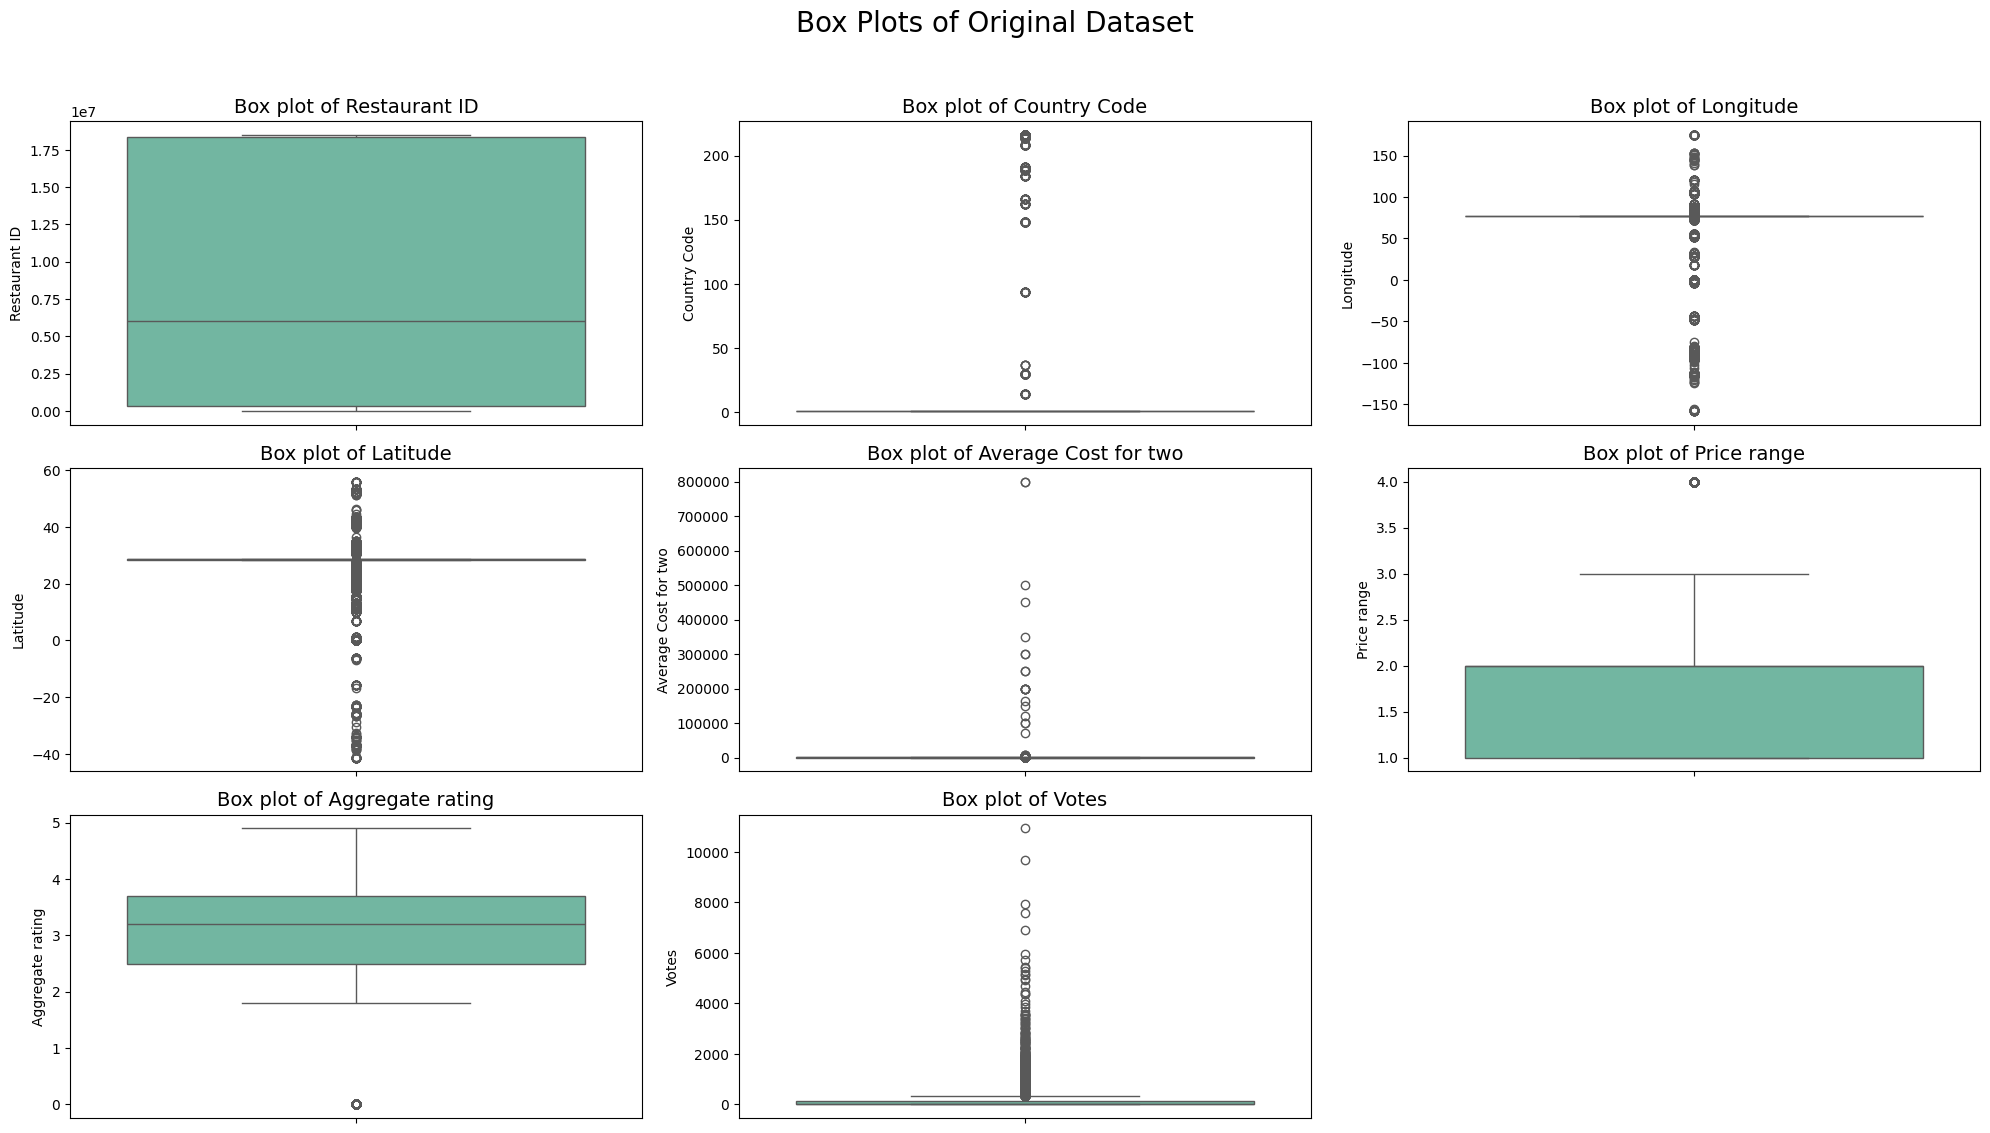

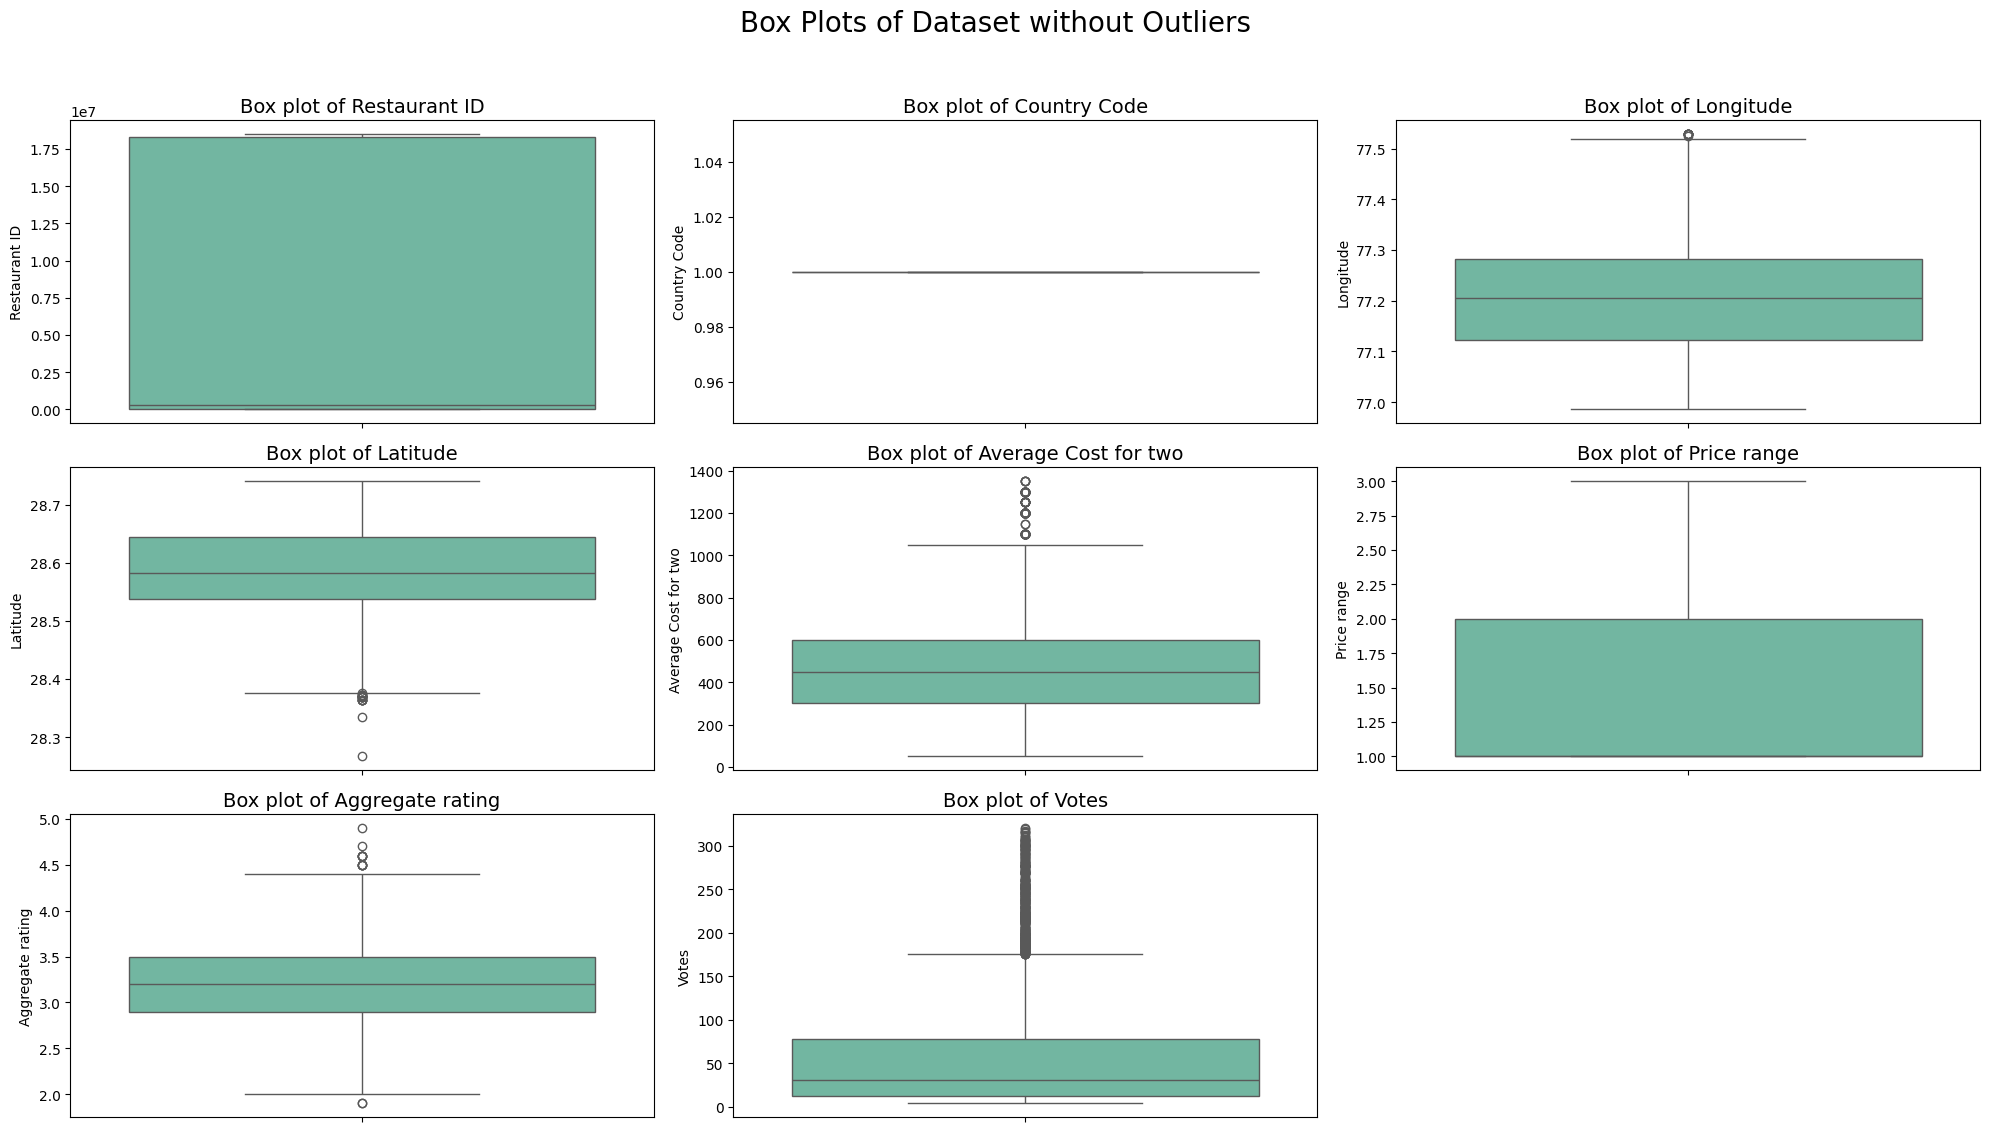

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plt.suptitle('Box Plots of Original Dataset', fontsize=20)
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=column, palette='Set2')
    plt.title(f'Box plot of {column}', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plots for the dataset without outliers
plt.figure(figsize=(20, 15))
plt.suptitle('Box Plots of Dataset without Outliers', fontsize=20)
for i, column in enumerate(df_no_outliers.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_no_outliers, y=column, palette='Set2')
    plt.title(f'Box plot of {column}', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# <span style="color: #FFC0CB;">QUES-2.</span>


#### <span style="color: green;">Here are the main reasons for analyzing outliers:</span>

### <span style="color: blue;">Analyzing outliers is essential because they can provide valuable insights or indicate potential issues within a dataset.</span>

#### <span style="color: green;">Here are the main reasons for analyzing outliers:</span>

---

1. <span style="color: red;">_`Identify Data Errors`_</span>: Outliers may reveal data entry errors, measurement inaccuracies, or other anomalies that could skew analysis results.

2. <span style="color: orange;">_`Understand Data Variability`_</span>: Outliers help in understanding the variability and distribution of the data. They might represent rare events or extreme cases that are important to the study.

3. <span style="color: purple;">_`Assess Model Robustness`_</span>: Analyzing outliers can show how sensitive a model is to unusual data points, which is crucial for ensuring that the model generalizes well to new data.

4. <span style="color: teal;">_`Discover New Insights`_</span>: Outliers might indicate new or unexpected phenomena that could lead to further investigation or discoveries.

5. <span style="color: brown;">_`Ensure Accurate Conclusions`_</span>: By identifying and handling outliers appropriately, you can avoid drawing incorrect conclusions from your data analysis.


# Q3) Find All Missing Null Values Using Two Different Methods in a Dataset

## 1. Using `isnull().sum()` Method:

In [16]:
missing_values = df[df.isnull().any(axis=1)]
missing_values

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


### OR Using `isna` method

In [18]:
missing_values1 = df[df.isna().any(axis=1)]
missing_values1.shape

(9, 21)

In [53]:
missing_values1.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.1540,31.5772,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.1759,31.5882,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.1534,31.5751,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160


## 2. Using `info()` Method:

In [14]:
df.info()

# Here again we can see count of non-null in cuisines i.e. 9542 which is 9 less than 9551

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Q4) Explore whether we can merge "zomato.csv" and "country_code.xlsx" if yes then show the whole file in the csv format?

In [21]:
country_code= pd.read_excel('Country-Code.xlsx')
country_code.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


from matplotlib import pyplot as plt
_df_0['Country Code'].plot(kind='hist', bins=20, title='Country Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Country Code']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Country Code'}, axis=1)
              .sort_values('Country Code', ascending=True))
  xs = counted['Country Code']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Country Code', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Country Code')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Country Code'].plot(kind='line', figsize=(8, 4), title='Country Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='Country Code', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

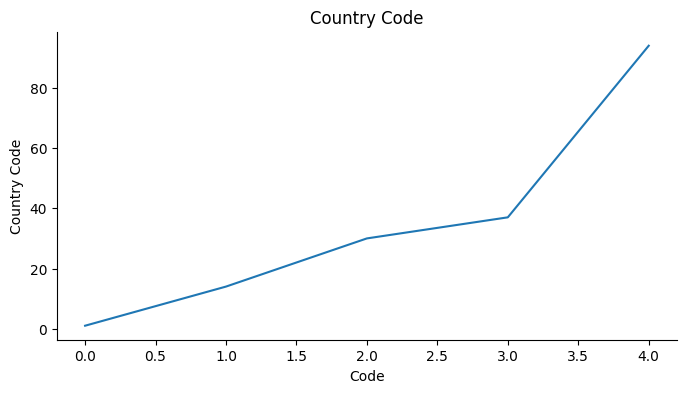

In [48]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=_df_3, x=_df_3.index, y='Country Code')

# Set the title
plt.title('Country Code')
plt.xlabel('Code')
# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

In [27]:
zomato_with_country_code = pd.merge(df, country_code, on='Country Code')
zomato_with_country_code.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# Q5) Find top 3 countries which uses zomato and plot it using piechart?

In [29]:
country_counts = zomato_with_country_code['Country'].value_counts()
top_3_countries = country_counts.head(3)
print(top_3_countries)

Country
India             8652
United States      434
United Kingdom      80
Name: count, dtype: int64


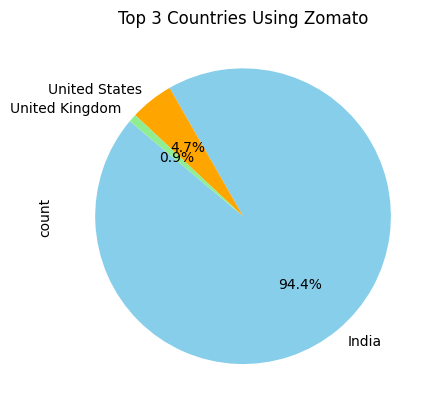

In [32]:
top_3_countries.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Top 3 Countries Using Zomato')
plt.show()

# Q6) Use features like Aggregate Rating, Rating color, Rating text and try to findout the count present for each rating of the restaurants.

In [37]:
aggr_rat= zomato_with_country_code['Aggregate rating'].value_counts()
aggr_rat

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,498
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


In [38]:
rating_color= zomato_with_country_code['Rating color'].value_counts()
rating_color

,count
Rating color,
Orange,3737
White,2148
Yellow,2100
Green,1079
Dark Green,301
Red,186


In [39]:
rating_text= zomato_with_country_code['Rating text'].value_counts()
rating_text

,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


#### <span style="color: green;">Plot of Rating Text and Rating color</span>

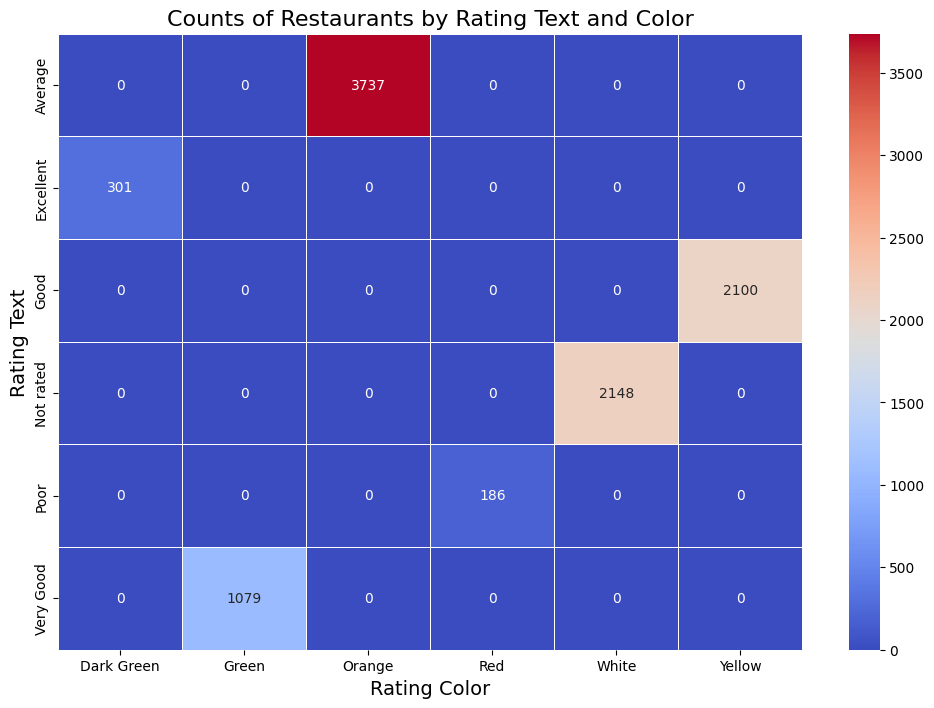

In [50]:
rating_counts = zomato_with_country_code.groupby(['Rating text', 'Rating color']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rating_counts, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)

# Set plot titles and labels
plt.title('Counts of Restaurants by Rating Text and Color', fontsize=16)
plt.xlabel('Rating Color', fontsize=14)
plt.ylabel('Rating Text', fontsize=14)

# Display the plot
plt.show()

#### <span style="color: yellow;">PLOT OF AGGRERATE RATING WITH COUNT</span>

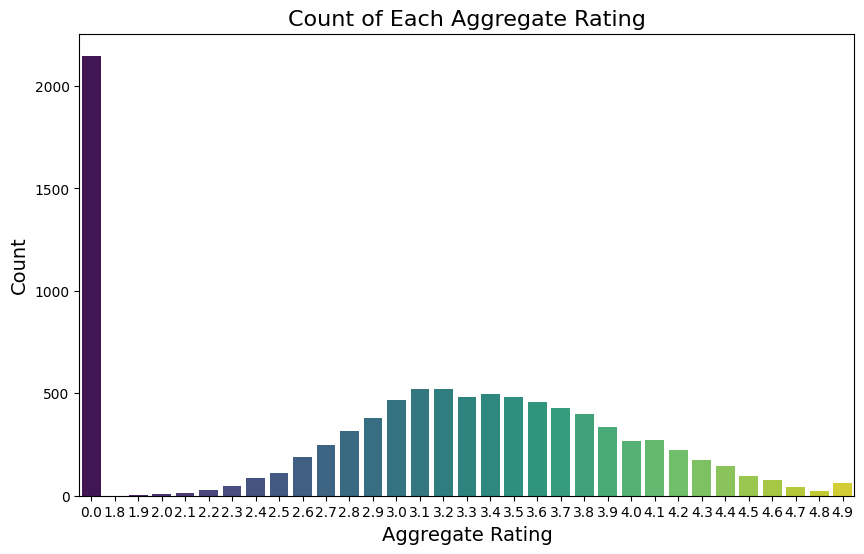

In [52]:
# Count the number of restaurants for each Aggregate Rating
rating_counts = zomato_with_country_code['Aggregate rating'].value_counts().sort_index()

# Plot bar plot of Aggregate Rating counts
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set titles and labels
plt.title('Count of Each Aggregate Rating', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()
